# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [33]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [34]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [35]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [36]:
spaceship = spaceship.drop(columns=["PassengerId", "Cabin", "Name"])

In [37]:
spaceship.dropna(inplace=True)

In [38]:
spaceship = pd.get_dummies(spaceship, drop_first=True)

Now perform the same as before:
- Feature Scaling
- Feature Selection


**Perform Train Test Split**

In [39]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(spaceship.drop("Transported", axis=1), spaceship.Transported, random_state=42)

**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [45]:
#your code here
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1) # fixing random state because I'm a chicken and terrified that random variation screws up my example
tree.fit(X_train, y_train)
print(tree.score(X_test,y_test))

0.002996345497094155


In [49]:
from sklearn.ensemble import BaggingRegressor

bagging_reg = BaggingRegressor(
    DecisionTreeRegressor(max_depth=5), # depth 3 to force tree to be "weak"
    n_estimators=50, # 10 trees
    max_samples=100, # we limit each weaker tree to 100 datapoints
    random_state=1) # fixing random state because I want my examples to work and to look smart

bagging_reg.fit(X_train, y_train)
bagging_reg.score(X_test,y_test)

0.3869104947079346

- Random Forests

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=50, # same 10 trees
                               max_depth=3, # depth 3 to force tree to be "weak"
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
forest.fit(X_train, y_train)
forest.score(X_test,y_test)

0.34305235645008847

- Gradient Boosting

In [60]:
#your code here
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=3, #gradient boosting always works with trees, no need to call the tree regressor
                                   n_estimators=50,
                                   random_state=1 # tastes like chicken
                                   )
gb_reg.fit(X_train, y_train)
gb_reg.score(X_test,y_test)

0.42817204990023494

In [63]:
import pandas as pd

# Get feature importances
importances = gb_reg.feature_importances_

# Put into DataFrame for easier viewing
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

print(feature_importances)


                      feature  importance
8              CryoSleep_True    0.410979
4                         Spa    0.124773
1                 RoomService    0.107169
5                      VRDeck    0.106697
2                   FoodCourt    0.087908
6           HomePlanet_Europa    0.051299
3                ShoppingMall    0.036410
0                         Age    0.032679
7             HomePlanet_Mars    0.031795
10    Destination_TRAPPIST-1e    0.008262
9   Destination_PSO J318.5-22    0.002030
11                   VIP_True    0.000000


- Adaptive Boosting

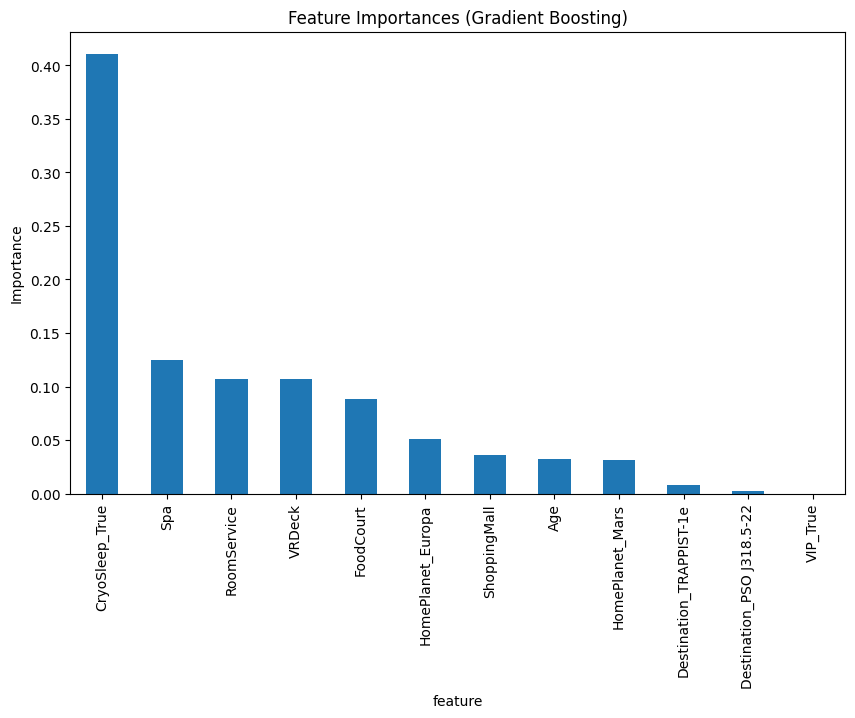

In [64]:
import matplotlib.pyplot as plt

feature_importances.plot(
    x='feature', 
    y='importance', 
    kind='bar', 
    figsize=(10,6), 
    legend=False
)
plt.ylabel("Importance")
plt.title("Feature Importances (Gradient Boosting)")
plt.show()


In [62]:
#your code here
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
                            n_estimators=30, # that's more like it
                            random_state=1 # once a coward, always a coward
                            )
ada_reg.fit(X_train, y_train)
ada_reg.score(X_test,y_test)

0.3388605047602946

Which model is the best and why?

In [44]:
#comment here